In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



age
Age of the person

sex
Gender of the person

cp
Chest Pain type chest pain type

trtbps
resting blood pressure (in mm Hg)

chol
cholestoral in mg/dl fetched via BMI sensor

fbs
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalachh
maximum heart rate achieved

exng
exercise induced angina (1 = yes; 0 = no)

oldpeak
Previous peak

In [390]:
heart_Attack = pd.read_csv('heart.csv')
heart_Attack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


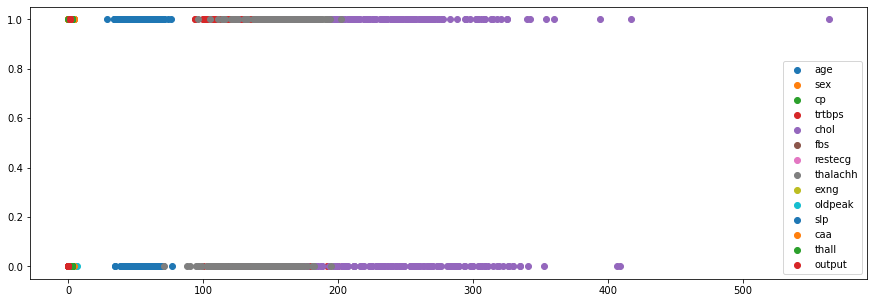

In [391]:
from cProfile import label


features = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']
for feature in features:
    if feature == 'age':
        plt.figure(figsize=(15,5))
    
    plt.scatter(heart_Attack[feature], heart_Attack.output, label=feature)
    if feature == 'output':
        plt.legend()

In [392]:
heart_Attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [393]:
heart_Attack.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


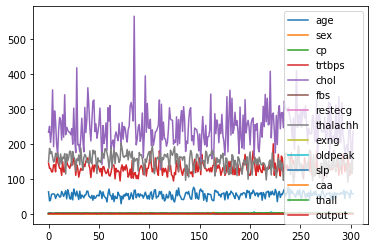

In [394]:

heart_Attack.plot()
plt.show()

207 96 0


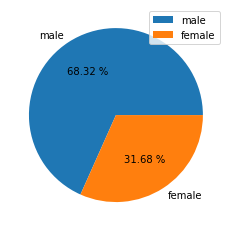

In [395]:
hsn = heart_Attack.sex.values
female,male = 0,0
for i in hsn:
    if i == 0:
        female +=1
    else:
        male +=1
    
print(male,female, male+female-len(hsn))
plt.pie([male, female], labels=['male','female'],autopct='%.2f %%')
plt.legend()
plt.show()
        

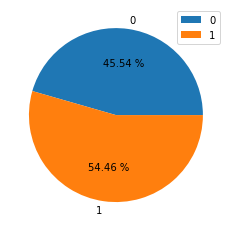

In [396]:
Zero_output =heart_Attack.output.value_counts()[0]
One_output = heart_Attack.output.value_counts()[1]
plt.pie([Zero_output,One_output], labels=[0,1], autopct='%.2f %%')
plt.legend()
plt.show()

Int64Index([0, 2, 1, 3], dtype='int64')


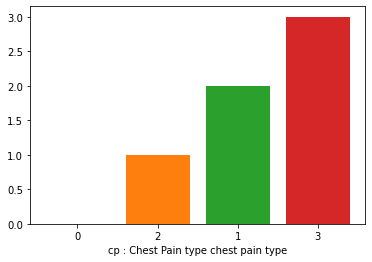

In [399]:
xy =heart_Attack.cp.value_counts()
x_1 = xy.index
print(x_1)
#plt.bar("par1", x[0])
#plt.bar("bar2", x[1])

for i in range(len(xy)):
    if i == 0:
        plt.xlabel('cp : Chest Pain type chest pain type')
    plt.bar(str(x_1[i]), i)

In [ ]:
heart_Attack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Int64Index([58, 57, 54, 59, 52, 51, 62, 60, 44, 56, 64, 41, 63, 67, 65, 43, 45,
            55, 42, 61, 53, 46, 48, 66, 50, 49, 47, 70, 39, 35, 68, 38, 71, 40,
            69, 34, 37, 29, 74, 76, 77],
           dtype='int64')


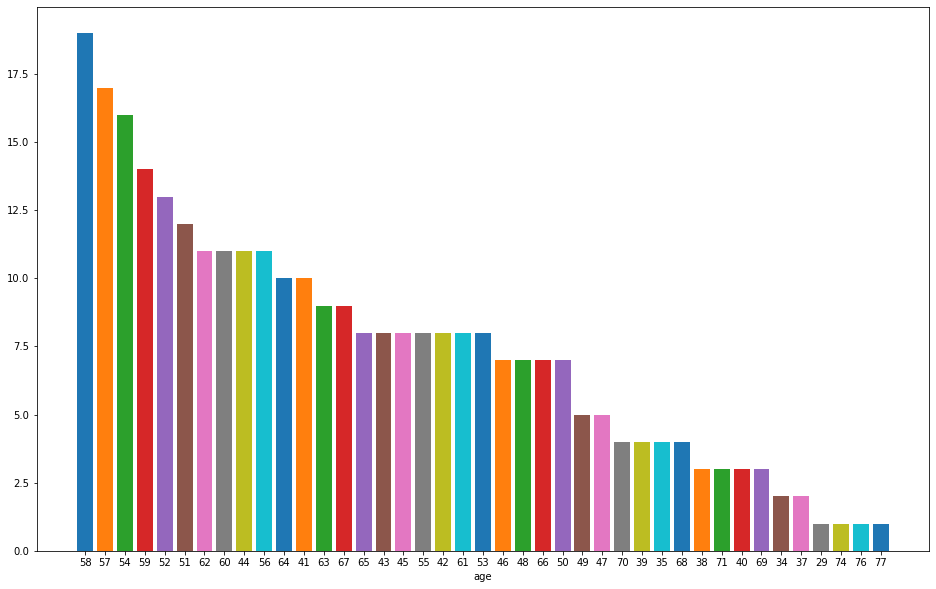

In [ ]:
age_val = heart_Attack.age.value_counts()
agef = age_val.index 
print(agef)


for i in range(len(age_val)):
    if i == 0:
        plt.figure(figsize=(16,10))
        plt.xlabel("age")
    plt.bar(str(agef[i]), age_val.iloc[i])
    #if i == len(age_val):
   #  plt.xticks(agef[::3])

# for value,ageff in age_val,agef:
#     plt.bar(str(ageff), value)

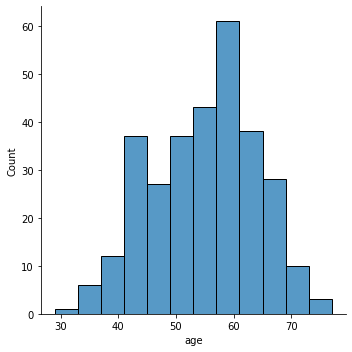

In [ ]:
sns.displot(heart_Attack['age'])
plt.show()

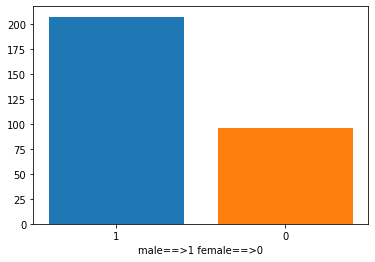

In [ ]:
sex_val = heart_Attack.sex.value_counts()
sexf = sex_val.index
for value in range(len(sex_val)):
    if value == 0:
        plt.xlabel("male==>1 female==>0")
    plt.bar(str(sexf[value]),sex_val.iloc[value])

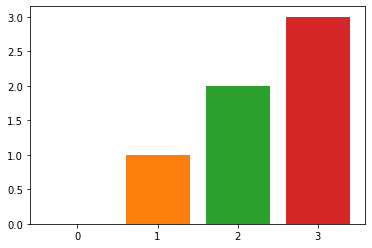

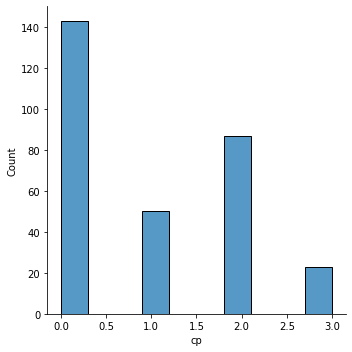

In [ ]:
cp_val = heart_Attack.cp.value_counts()
cpf = cp_val.index

for val in range(len(cp_val)):
    plt.bar(str(val), val)
sns.displot((heart_Attack.cp))


In [ ]:
heart_Attack.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
x = heart_Attack.drop(['output'], axis=1).values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
y = heart_Attack.output.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=40)
 

In [ ]:
Logit = LogisticRegression(penalty= 'l2',solver = 'liblinear',max_iter=700)
Logit.fit(x_train,y_train)

LogisticRegression(max_iter=700, solver='liblinear')

In [ ]:
y_pred = Logit.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [ ]:
prediction = pd.DataFrame({'output':y_test, 'predicted_output' : y_pred, 'Y-Y^' : y_test-y_pred })
prediction
prediction_tabel = prediction.to_excel('logistic_regression2.xlsx')

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE 
print(MAE(y_test, y_pred))
from sklearn.metrics import mean_squared_error as MSE
print(MSE(y_test,y_pred))

0.12871287128712872
0.12871287128712872


In [ ]:
score = Logit.score(x_test,y_test)
score

0.8712871287128713

In [ ]:
score2 = Logit.score(x_test, y_pred)
score2

1.0